In [194]:
import numpy as np
import matplotlib.pyplot as plt

# def initial_condition(x, case):
#     if case == "a":
#         return np.piecewise(x, [x < 3, x >= 3], [3*np.pi/2, np.pi/2])
#     elif case == "b":
#         return np.piecewise(x, [x < 3, x >= 3], [np.pi/2, 3*np.pi/2])
#     elif case == "c":
#         return np.piecewise(x, [x < 3, 3 <= x <= 3.1, x > 3.1],  [np.pi/2, np.pi*(x-3)/0.1+np.pi/2, 3*np.pi/2])
#     

def initial_condition(x, case):
    # if x < 3:
    #     return np.pi/2
    # elif 3 <= x <= 3.3:
    #     return np.pi*(x-3)/0.3+np.pi/2
    # else:
    #     return 3*np.pi/2
    return np.piecewise(x, [x < 3, 3 <= x <= 3.3, x > 3.3],  [np.pi/2, lambda x: np.pi*(x-3)/0.3+np.pi/2, 3*np.pi/2])
    
    
def f(u, case):
    if case == "square":
        return u**2
    elif case == "sin":
        return np.sin(u)
    return 0

def solve_pde(eps, f_case, G_case, x_range, t_max, nx, nt):
    
    x = np.linspace(x_range[0], x_range[1], nx)
    t = np.linspace(0, t_max, nt)
    dx = x[1] - x[0]
    dt = t[1] - t[0]
    assert eps * dt / dx**2 + 3*np.pi/2 * dt / dx <= 1, "Условие устойчивости не выполнено"


    u = initial_condition(x, G_case)
    U = [u.copy()]

    for n in range(1, nt):
        u_next = u.copy()
        for i in range(1, nx - 1):
            diff_term = eps * (u[i + 1] - 2 * u[i] + u[i - 1]) / dx**2
            adv_term = -0.5 * (u[i + 1] - u[i - 1]) / dx
            source_term = f(u[i], f_case)
            u_next[i] = u[i] + dt * (diff_term + adv_term + source_term)
        U.append(u_next)
        u = u_next

    return x, t, np.array(U)

def plot_solution(x, t, U, title):
    X, T = np.meshgrid(x, t)
    plt.figure(figsize=(8, 6))
    plt.contourf(X, T, U, levels=50, cmap="viridis")
    plt.colorbar(label="u(x, t)")
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("t")
    plt.show()
    
def plot_solution_for_fixed_t(x, U, t, fixed_t_indices):
    plt.figure(figsize=(10, 6))
    for idx in fixed_t_indices:
        plt.plot(x, U[idx], label=f't = {t[idx]:.2f}')
    plt.title("Решение u(x, t) при фиксированных t")
    plt.xlabel("x")
    plt.ylabel("u(x, t)")
    plt.legend()
    plt.grid()
    plt.show()

eps = 0.1
x_range = [0, 6]
t_max = 2
nx = 500
nt = 5000
fixed_t_indices = [0, nt // 4, nt // 2, 3 * nt // 4, nt - 1]


In [195]:
def initial_condition_new(x):
    if x < 3:
        return np.pi/2
    elif 3 <= x <= 3.3:
        return np.pi*(x-3)/0.3+np.pi/2
    else:
        return 3*np.pi/2


In [196]:
x = np.linspace(x_range[0], x_range[1], nx)
print(initial_condition(x, "c"))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

[array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.57079633), array(1.570

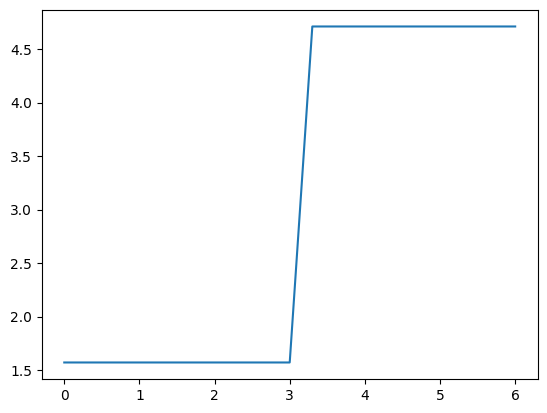

In [181]:
x = np.linspace(x_range[0], x_range[1], nt)
f = []
for i in x:
    f.append(initial_condition(i, "c"))
print(f)

plt.plot(x, f)

In [188]:
'''
"a" или "b" для начального условия
"square" для u^2, "sin" для sin(u)
'''

def draw_sol(f_case, G_case):
    x, t, U = solve_pde(eps, f_case, G_case, x_range, t_max, nx, nt)
    # plot_solution(x, t, U, "Решение уравнения u(x,t) - цветовая карта")
    plot_solution_for_fixed_t(x, U, t, fixed_t_indices)
    
import warnings
warnings.filterwarnings('ignore')


In [189]:
draw_sol(f_case="sin", G_case="c")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
draw_sol(f_case="sin", G_case="b")

In [ ]:

draw_sol(f_case="square", G_case="a")

In [ ]:
draw_sol(f_case="square", G_case="b")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
L = 5  # Domain length
Nx = 100  # Number of spatial points
Nt = 1000  # Number of time steps
T = 2  # Final time

epsilon = 0.1  # Diffusion coefficient
a = 1.0  # Convection coefficient

# Discretization
x = np.linspace(0, L, Nx)
dx = x[1] - x[0]
dt = T / Nt

# Stability condition
assert dt <= dx**2 / (2 * epsilon), "Stability condition violated! Reduce dt or increase dx."

# Initial condition
def G(x):
    return np.piecewise(x, [x < 3, x >= 3], [3*np.pi/2, np.pi/2])
# Flux function
def f(u):
    return u * u

# Initialize solution
u = G(x)
u_new = np.zeros_like(u)

# Time-stepping loop
for n in range(Nt):
    # Compute flux differences
    flux = f(u)
    
    # Finite difference scheme (Lax-Wendroff)
    u_x = (flux[2:] - flux[:-2]) / (2 * dx)
    u_xx = (u[2:] - 2 * u[1:-1] + u[:-2]) / dx**2

    u_new[1:-1] = u[1:-1] - dt * u_x + epsilon * dt * u_xx

    # Update solution
    u = u_new.copy()

    # Optional: Plot live solution
    if n % 100 == 0:
        plt.clf()
        plt.plot(x, u, label=f"t = {n * dt:.2f}")
        plt.xlabel("x")
        plt.ylabel("u")
        plt.title("Numerical Solution of Convection-Diffusion Equation")
        plt.pause(0.01)

plt.plot(x, u, label=f"Final solution at t={T}")
plt.legend()
plt.show()
